# import libraries


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans

# load the data

In [3]:
df=pd.read_csv('Data_sets/Diet_Dataset.csv')

In [4]:
df.head()

,Food_items,Breakfast,Lunch,Dinner,VegNovVeg,Junk Food,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars,Link
0,Asparagus Cooked,0,1,1,0,0,22,0.2,2.4,0.91,23.0,14.0,224.0,4.1,2.0,0.0,1.3,https://tse1.mm.bing.net/th/id/OIP.JiunioH6eDM...
1,Avocados,1,0,0,0,0,160,15.0,2.0,0.55,12.0,7.0,485.0,8.5,6.7,0.0,0.7,https://domf5oio6qrcr.cloudfront.net/medialibr...
2,Bananas,1,0,0,0,0,89,0.3,1.1,0.26,5.0,1.0,358.0,23.0,2.6,0.0,12.0,https://images.heb.com/is/image/HEBGrocery/000...
3,Boiled Egg,1,1,1,1,0,155,10.0,12.0,1.20,50.0,124.0,126.0,1.1,0.0,2.2,1.1,https://steamykitchen.com/wp-content/uploads/2...
4,Fried Egg,1,1,1,1,0,196,14.8,13.0,1.90,62.0,207.0,152.0,0.9,0.0,2.2,0.4,https://bing.com/th?id=OSK.53089988fc3e045aef7...


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Food_items     231 non-null    object 
 1   Breakfast      231 non-null    int64  
 2   Lunch          231 non-null    int64  
 3   Dinner         231 non-null    int64  
 4   VegNovVeg      231 non-null    int64  
 5   Junk Food      231 non-null    int64  
 6   Calories       231 non-null    int64  
 7   Fats           231 non-null    float64
 8   Proteins       231 non-null    float64
 9   Iron           231 non-null    float64
 10  Calcium        231 non-null    float64
 11  Sodium         231 non-null    float64
 12  Potassium      231 non-null    float64
 13  Carbohydrates  231 non-null    float64
 14  Fibre          231 non-null    float64
 15  VitaminD       231 non-null    float64
 16  Sugars         231 non-null    float64
 17  Link           231 non-null    object 
dtypes: float64

In [8]:
df.duplicated().sum()



0

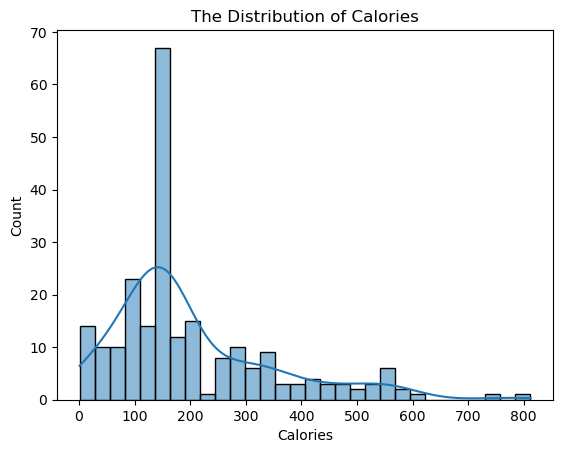

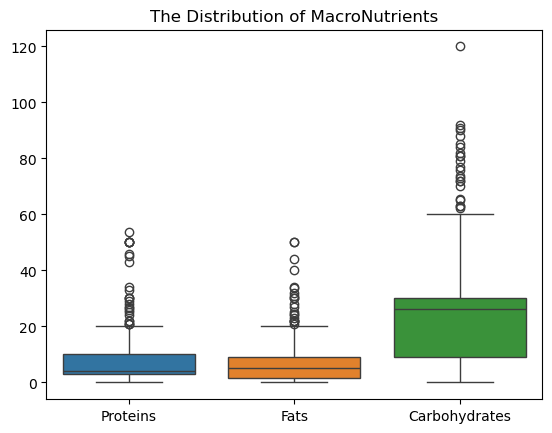

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Calories'], bins=30,kde=True)
plt.title('The Distribution of Calories')
plt.show()

sns.boxplot(data=df[['Proteins','Fats','Carbohydrates']])
plt.title('The Distribution of MacroNutrients')
plt.show()

In [14]:
#Define nutritional categories based on macros
def categorize_nutrition(row):
    if row['Proteins']>row['Carbohydrates'] and row['Proteins']>row['Fats']:
        return 'High-Protein'
    elif row['Carbohydrates']>row['Proteins'] and row['Carbohydrates']>row['Fats']:    
        return 'High-Carbs'
    elif row['Fats']>row['Proteins'] and row['Fats']>row['Carbohydrates']:    
        return 'High-Fats'
    else:
        return 'Balanced'
df['Nutrition_Type']=df.apply(categorize_nutrition, axis=1)

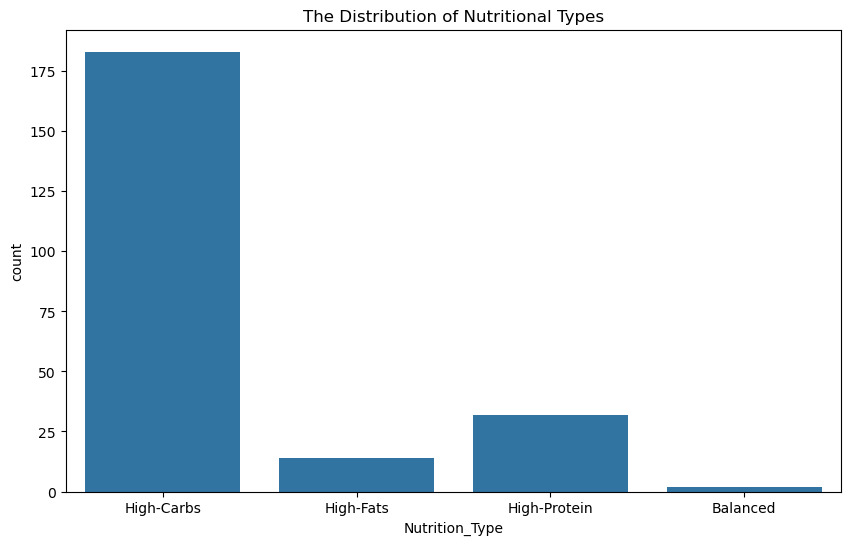

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Nutrition_Type')
plt.title('The Distribution of Nutritional Types')
plt.show()

C:\Users\prsnn\AppData\Local\Temp\ipykernel_44072\2849173494.py:18: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


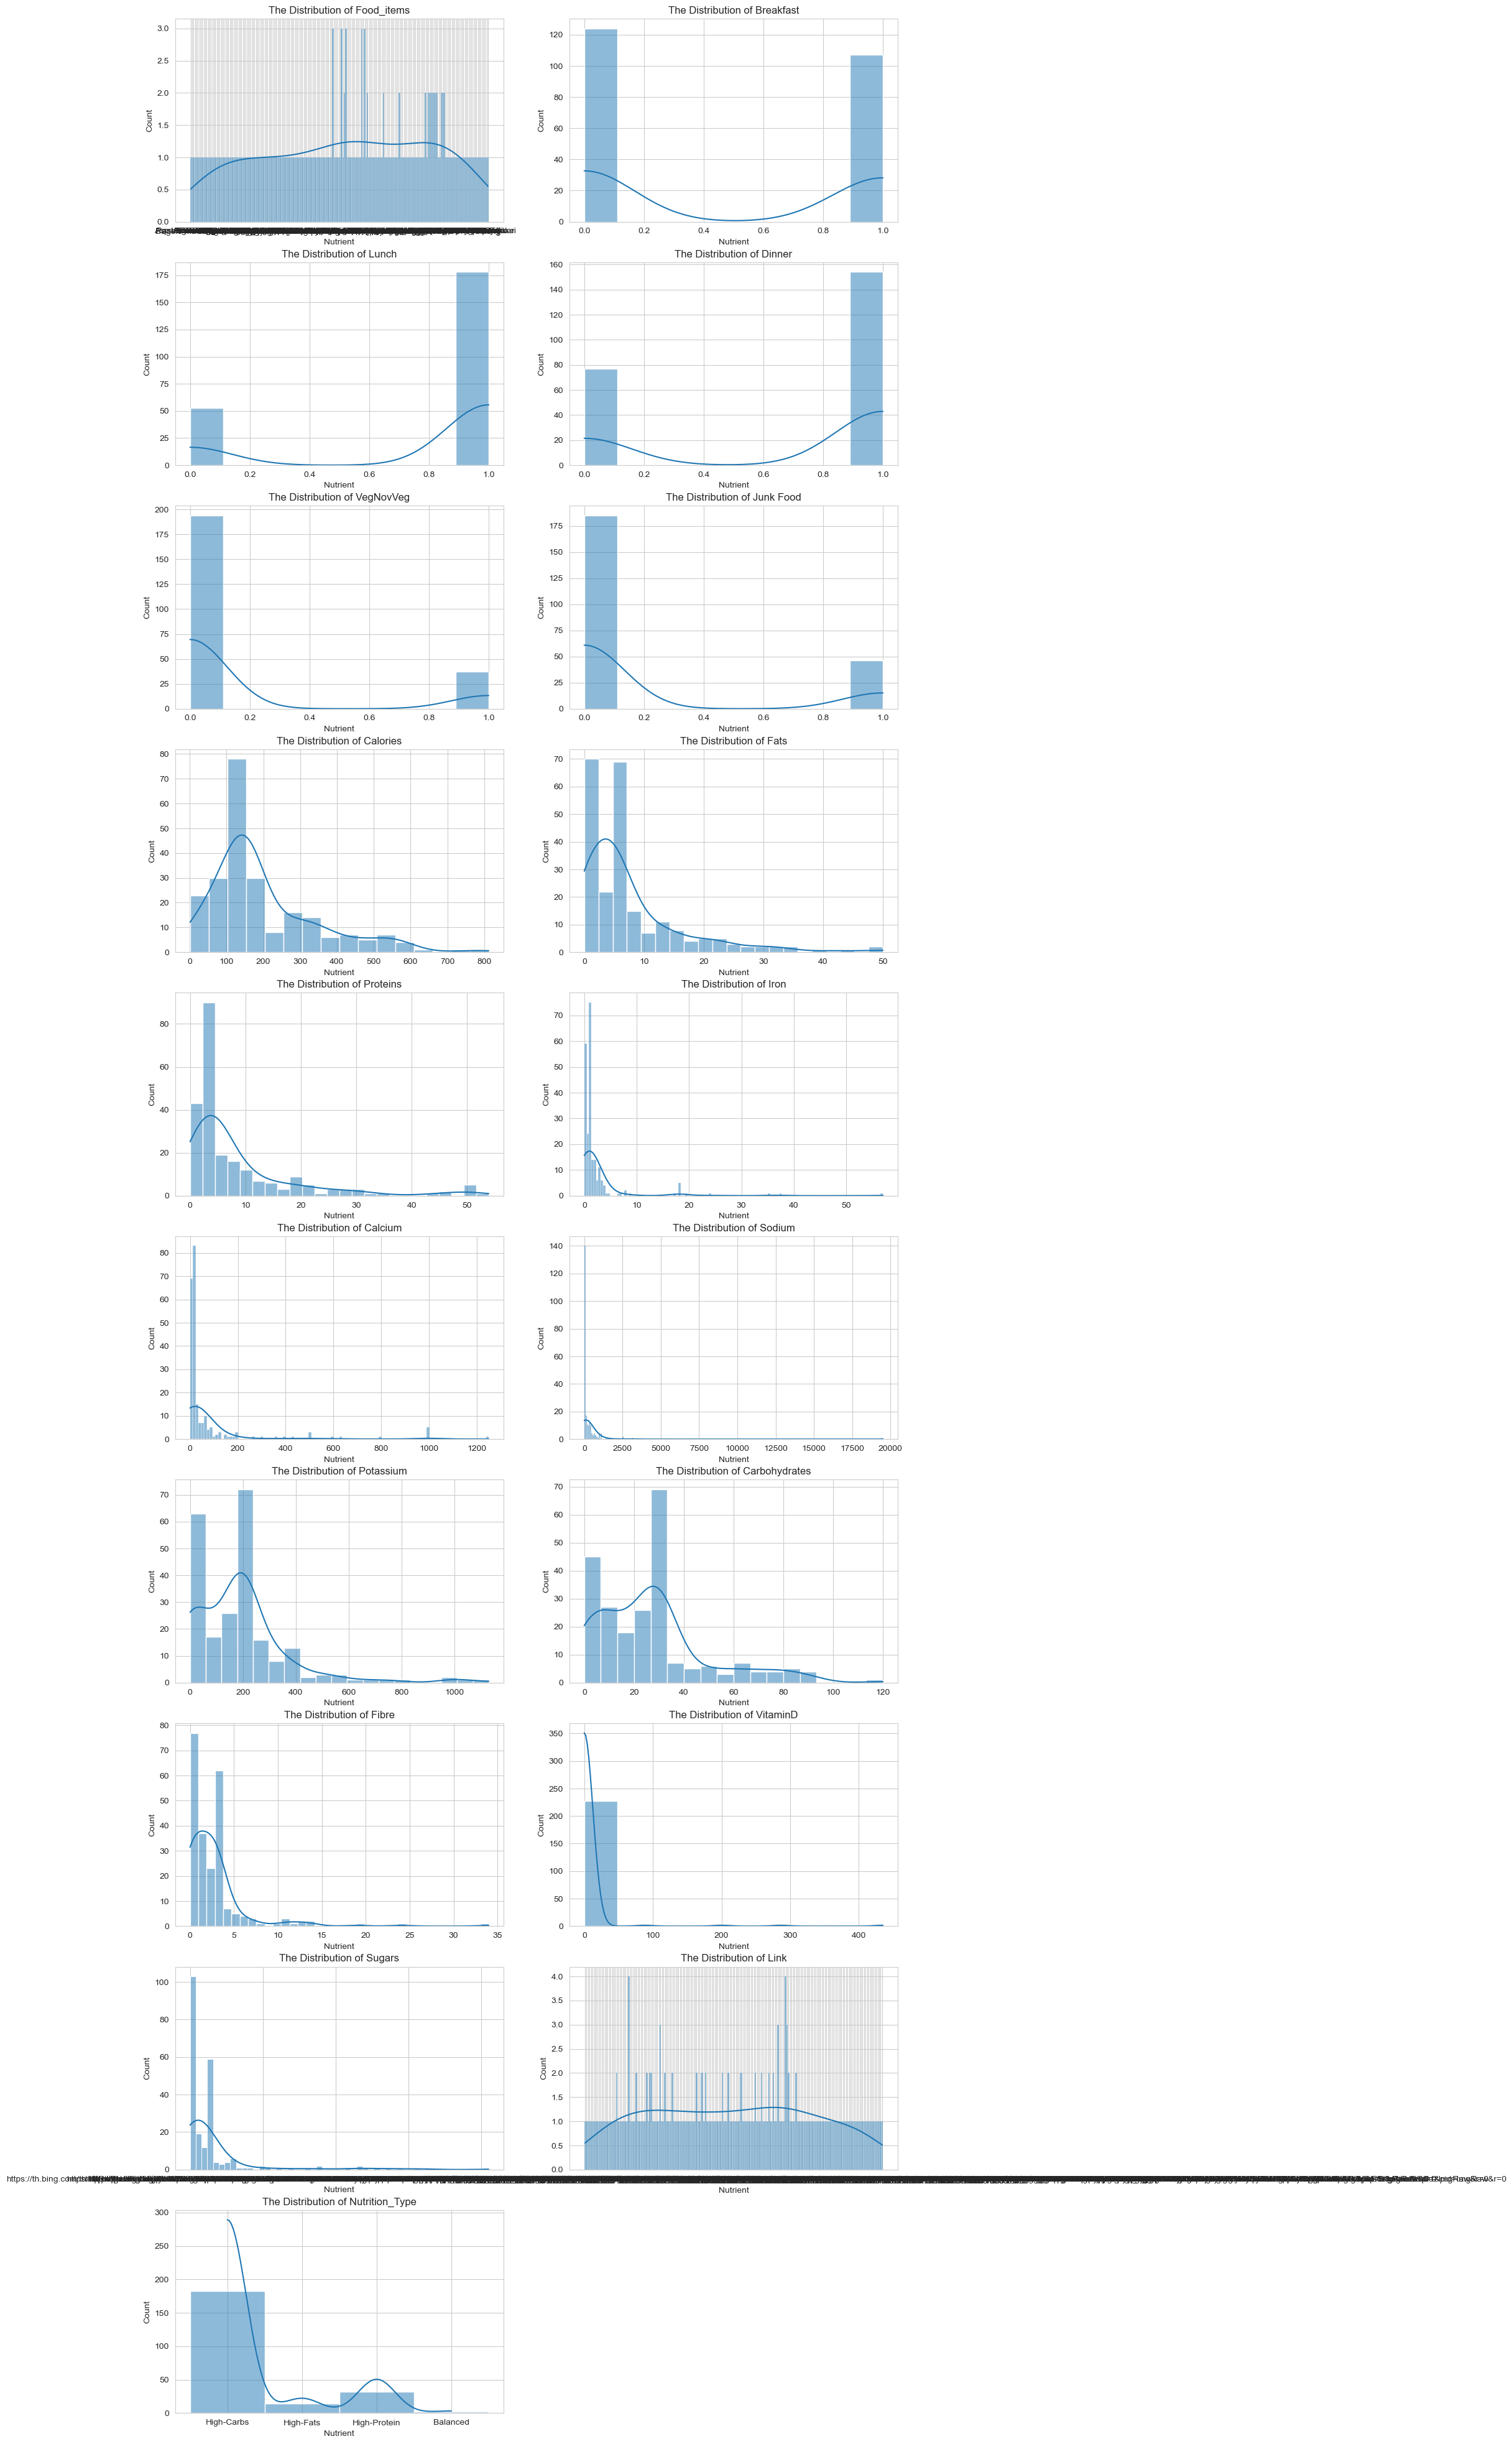

In [26]:
#set up the visualization style
sns.set_style('whitegrid')

#calculate how many rows we need (2 plots per row)
num_nutrients=len(df.columns)
n_rows=(num_nutrients+1)//2 # ensures we round up

#create figure with appropriate size
plt.figure(figsize=(15,5*n_rows)) # 5 units height per row

#plot distribution of key nutrients
for i, nutrient in enumerate(df.columns,1):
    plt.subplot(n_rows,2,i)
    sns.histplot(df[nutrient],kde=True)
    plt.title(f'The Distribution of {nutrient}')
    plt.xlabel('Nutrient')
    
plt.tight_layout()
plt.show()

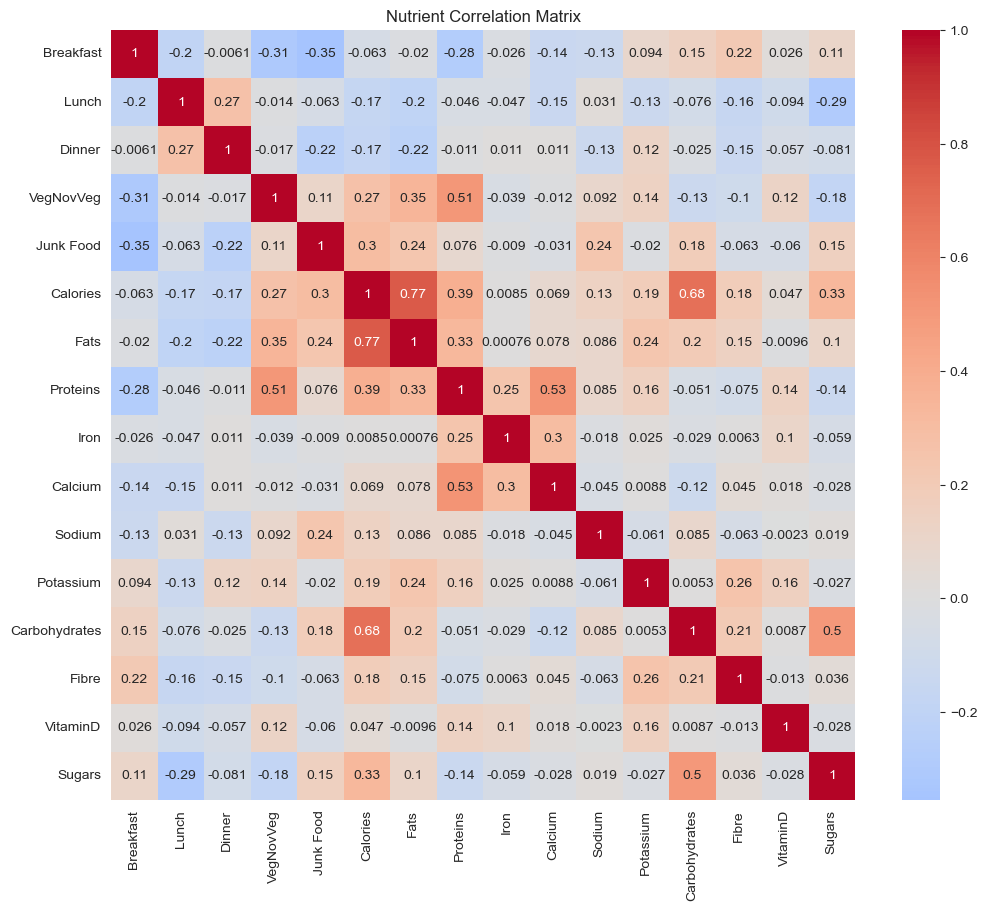

In [24]:
#correlation matrix
plt.figure(figsize=(12,10))
corr_matrix=df.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',center=0)
plt.title('Nutrient Correlation Matrix')
plt.show()

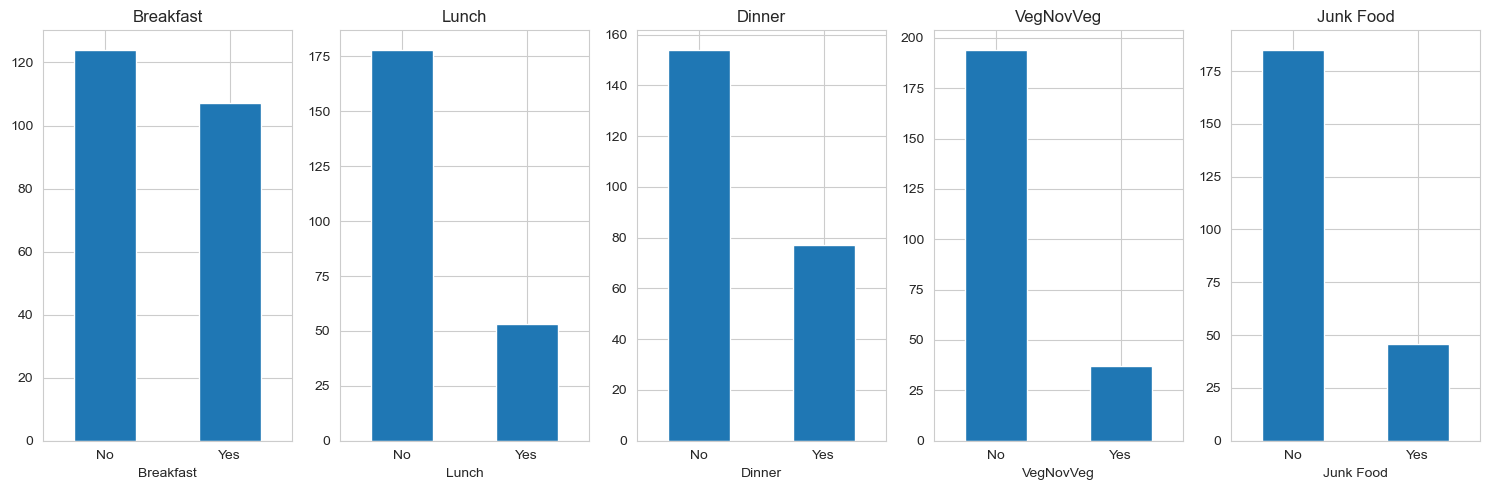

In [32]:
#plot food categories
categories=['Breakfast','Lunch','Dinner','VegNovVeg','Junk Food']
plt.figure(figsize=(15,5))
for i, category in enumerate(categories,1):
    plt.subplot(1,5,i)
    df[category].value_counts().plot(kind='bar')
    plt.title(category)
    plt.xticks([0,1],['No','Yes'],rotation = 0)
plt.tight_layout()
plt.show()

In [40]:
df.columns

Index(['Food_items', 'Breakfast', 'Lunch', 'Dinner', 'VegNovVeg', 'Junk Food',
       'Calories', 'Fats', 'Proteins', 'Iron', 'Calcium', 'Sodium',
       'Potassium', 'Carbohydrates', 'Fibre', 'VitaminD', 'Sugars', 'Link',
       'Nutrition_Type'],
      dtype='object')

In [41]:
breakfast_data=df[df['Breakfast'] ==1 ][['Food_items','VegNovVeg','Junk Food','Calories','Fats','Proteins','Iron','Calcium','Sodium','Potassium','Carbohydrates','Fibre','VitaminD','Sugars','Link']]

In [42]:
breakfast_data.head()

,Food_items,VegNovVeg,Junk Food,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars,Link
1,Avocados,0,0,160,15.0,2.0,0.55,12.0,7.0,485.0,8.5,6.7,0.0,0.7,https://domf5oio6qrcr.cloudfront.net/medialibr...
2,Bananas,0,0,89,0.3,1.1,0.26,5.0,1.0,358.0,23.0,2.6,0.0,12.0,https://images.heb.com/is/image/HEBGrocery/000...
3,Boiled Egg,1,0,155,10.0,12.0,1.20,50.0,124.0,126.0,1.1,0.0,2.2,1.1,https://steamykitchen.com/wp-content/uploads/2...
4,Fried Egg,1,0,196,14.8,13.0,1.90,62.0,207.0,152.0,0.9,0.0,2.2,0.4,https://bing.com/th?id=OSK.53089988fc3e045aef7...
6,Berries,0,0,349,0.4,14.0,6.80,190.0,298.0,77.0,77.0,13.0,0.0,46.0,https://th.bing.com/th/id/R.7b7c8a6bac9677484b...


In [43]:
lunch_data=df[df['Lunch'] ==1 ][['Food_items','VegNovVeg','Junk Food','Calories','Fats','Proteins','Iron','Calcium','Sodium','Potassium','Carbohydrates','Fibre','VitaminD','Sugars','Link']]

In [38]:
lunch_data.shape

(178, 14)

In [48]:
lunch_data.head()

,Food_items,VegNovVeg,Junk Food,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars,Link
0,Asparagus Cooked,0,0,22,0.2,2.4,0.91,23.0,14.0,224.0,4.1,2.0,0.0,1.3,https://tse1.mm.bing.net/th/id/OIP.JiunioH6eDM...
3,Boiled Egg,1,0,155,10.0,12.0,1.20,50.0,124.0,126.0,1.1,0.0,2.2,1.1,https://steamykitchen.com/wp-content/uploads/2...
4,Fried Egg,1,0,196,14.8,13.0,1.90,62.0,207.0,152.0,0.9,0.0,2.2,0.4,https://bing.com/th?id=OSK.53089988fc3e045aef7...
5,Bagels made in wheat,0,1,250,1.5,10.0,2.76,20.0,439.0,165.0,49.0,4.1,0.0,6.1,https://th.bing.com/th/id/OIP.-x7drBY85kA0GyPc...
7,Brocolli,0,0,25,0.5,3.8,1.27,118.0,56.0,343.0,3.1,2.8,0.0,0.6,https://th.bing.com/th/id/OIP.zeKqXlUZor5fT88s...


In [44]:
dinner_data=df[df['Dinner'] ==1 ][['Food_items','VegNovVeg','Junk Food','Calories','Fats','Proteins','Iron','Calcium','Sodium','Potassium','Carbohydrates','Fibre','VitaminD','Sugars','Link']]

In [46]:
dinner_data.shape

(154, 15)

In [47]:
dinner_data.head()

,Food_items,VegNovVeg,Junk Food,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars,Link
0,Asparagus Cooked,0,0,22,0.2,2.4,0.91,23.0,14.0,224.0,4.1,2.0,0.0,1.3,https://tse1.mm.bing.net/th/id/OIP.JiunioH6eDM...
3,Boiled Egg,1,0,155,10.0,12.0,1.20,50.0,124.0,126.0,1.1,0.0,2.2,1.1,https://steamykitchen.com/wp-content/uploads/2...
4,Fried Egg,1,0,196,14.8,13.0,1.90,62.0,207.0,152.0,0.9,0.0,2.2,0.4,https://bing.com/th?id=OSK.53089988fc3e045aef7...
5,Bagels made in wheat,0,1,250,1.5,10.0,2.76,20.0,439.0,165.0,49.0,4.1,0.0,6.1,https://th.bing.com/th/id/OIP.-x7drBY85kA0GyPc...
7,Brocolli,0,0,25,0.5,3.8,1.27,118.0,56.0,343.0,3.1,2.8,0.0,0.6,https://th.bing.com/th/id/OIP.zeKqXlUZor5fT88s...


In [49]:
#load to csv
breakfast_data.to_csv(r'Data_sets/Breakfast_data.csv')
lunch_data.to_csv(r'Data_sets/Lunch_data.csv')
dinner_data.to_csv(r'Data_sets/Dinner_data.csv')

In [52]:
#load datasets
breakfast=pd.read_csv('Data_sets/Breakfast_data.csv')
lunch=pd.read_csv('Data_sets/Lunch_data.csv')
dinner=pd.read_csv('Data_sets/Dinner_data.csv')


In [53]:
#quick Preview
display(breakfast.head())
display(lunch.head())
display(dinner.head())

,Unnamed: 0,Food_items,VegNovVeg,Junk Food,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars,Link
0,1,Avocados,0,0,160,15.0,2.0,0.55,12.0,7.0,485.0,8.5,6.7,0.0,0.7,https://domf5oio6qrcr.cloudfront.net/medialibr...
1,2,Bananas,0,0,89,0.3,1.1,0.26,5.0,1.0,358.0,23.0,2.6,0.0,12.0,https://images.heb.com/is/image/HEBGrocery/000...
2,3,Boiled Egg,1,0,155,10.0,12.0,1.20,50.0,124.0,126.0,1.1,0.0,2.2,1.1,https://steamykitchen.com/wp-content/uploads/2...
3,4,Fried Egg,1,0,196,14.8,13.0,1.90,62.0,207.0,152.0,0.9,0.0,2.2,0.4,https://bing.com/th?id=OSK.53089988fc3e045aef7...
4,6,Berries,0,0,349,0.4,14.0,6.80,190.0,298.0,77.0,77.0,13.0,0.0,46.0,https://th.bing.com/th/id/R.7b7c8a6bac9677484b...


,Unnamed: 0,Food_items,VegNovVeg,Junk Food,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars,Link
0,0,Asparagus Cooked,0,0,22,0.2,2.4,0.91,23.0,14.0,224.0,4.1,2.0,0.0,1.3,https://tse1.mm.bing.net/th/id/OIP.JiunioH6eDM...
1,3,Boiled Egg,1,0,155,10.0,12.0,1.20,50.0,124.0,126.0,1.1,0.0,2.2,1.1,https://steamykitchen.com/wp-content/uploads/2...
2,4,Fried Egg,1,0,196,14.8,13.0,1.90,62.0,207.0,152.0,0.9,0.0,2.2,0.4,https://bing.com/th?id=OSK.53089988fc3e045aef7...
3,5,Bagels made in wheat,0,1,250,1.5,10.0,2.76,20.0,439.0,165.0,49.0,4.1,0.0,6.1,https://th.bing.com/th/id/OIP.-x7drBY85kA0GyPc...
4,7,Brocolli,0,0,25,0.5,3.8,1.27,118.0,56.0,343.0,3.1,2.8,0.0,0.6,https://th.bing.com/th/id/OIP.zeKqXlUZor5fT88s...


,Unnamed: 0,Food_items,VegNovVeg,Junk Food,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars,Link
0,0,Asparagus Cooked,0,0,22,0.2,2.4,0.91,23.0,14.0,224.0,4.1,2.0,0.0,1.3,https://tse1.mm.bing.net/th/id/OIP.JiunioH6eDM...
1,3,Boiled Egg,1,0,155,10.0,12.0,1.20,50.0,124.0,126.0,1.1,0.0,2.2,1.1,https://steamykitchen.com/wp-content/uploads/2...
2,4,Fried Egg,1,0,196,14.8,13.0,1.90,62.0,207.0,152.0,0.9,0.0,2.2,0.4,https://bing.com/th?id=OSK.53089988fc3e045aef7...
3,5,Bagels made in wheat,0,1,250,1.5,10.0,2.76,20.0,439.0,165.0,49.0,4.1,0.0,6.1,https://th.bing.com/th/id/OIP.-x7drBY85kA0GyPc...
4,7,Brocolli,0,0,25,0.5,3.8,1.27,118.0,56.0,343.0,3.1,2.8,0.0,0.6,https://th.bing.com/th/id/OIP.zeKqXlUZor5fT88s...


In [54]:
def prepare_data(df):
    """Select nutritional features and clean data"""
    features=df[['Calories', 'Proteins','Carbohydrates','Fats']]
    return features.dropna()

#prepare data for each meal
bf_features=prepare_data(breakfast)
ln_features=prepare_data(lunch)
dn_features=prepare_data(dinner)

C:\Users\prsnn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\prsnn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\prsnn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\prsnn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

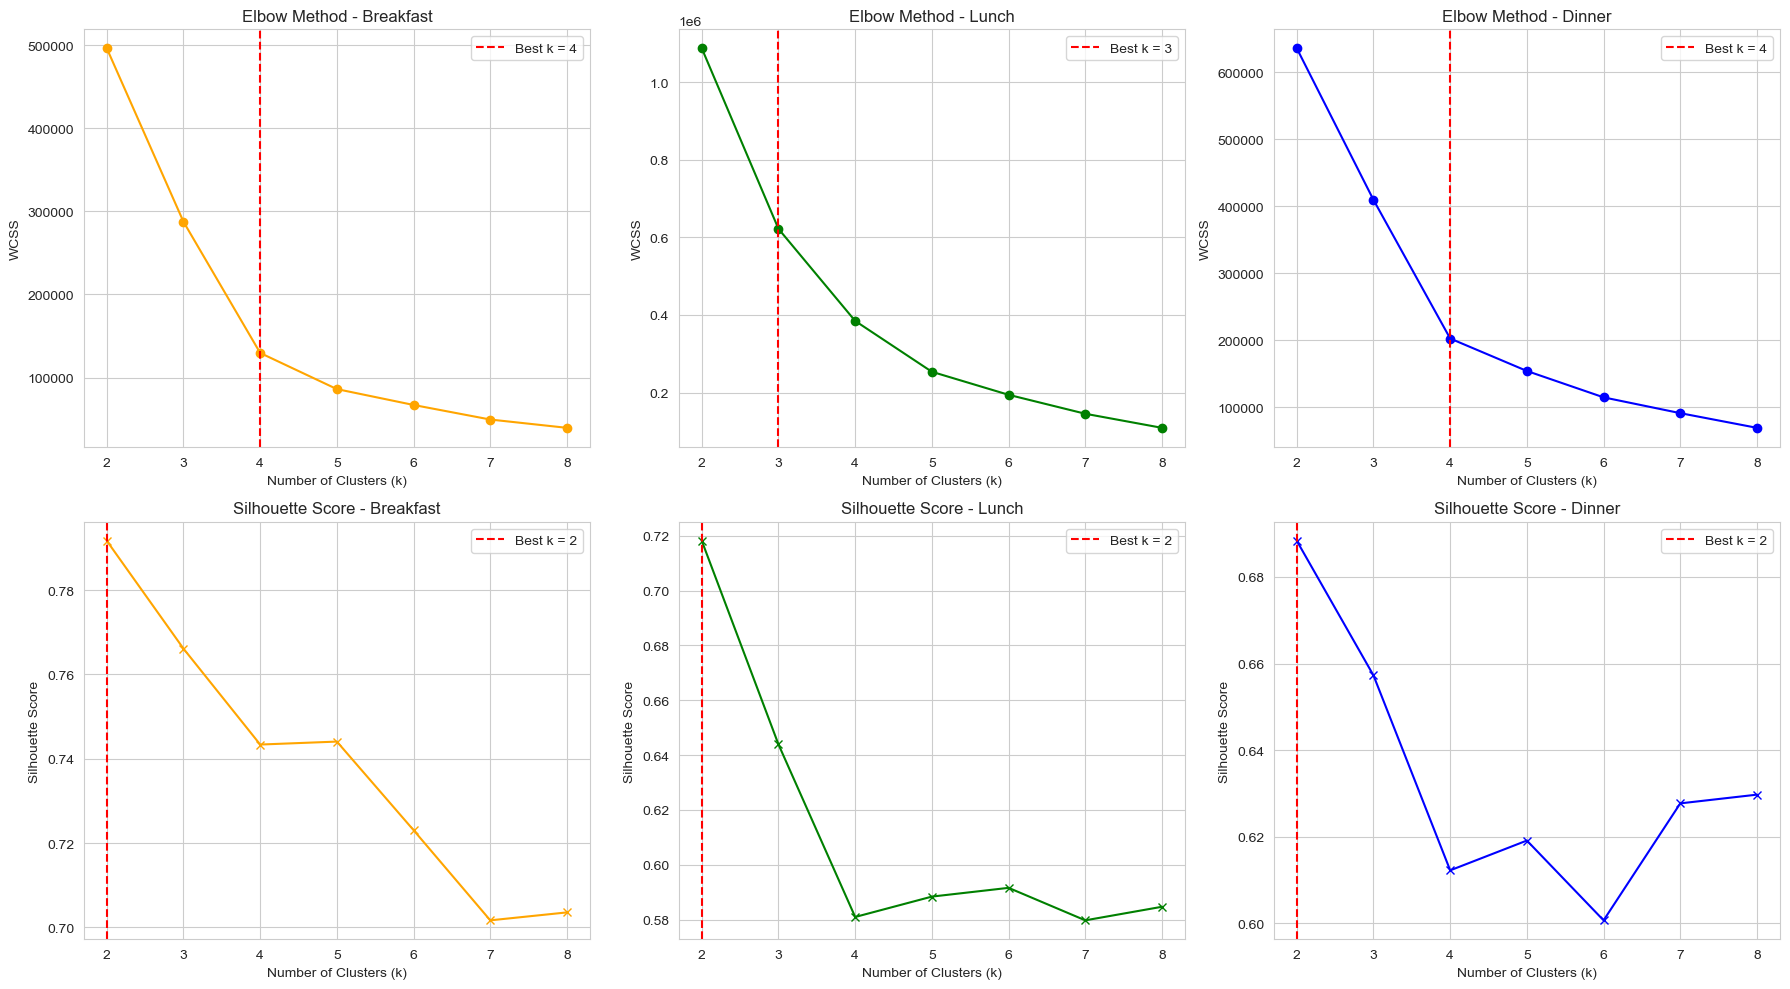

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def get_kmeans_metrics(data, max_k=8):
    """Returns WCSS, silhouette scores, best k from both methods"""
    wcss = []
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data)
        wcss.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, labels))

    elbow_deltas = np.diff(wcss, 2)  # second derivative
    elbow_k = np.argmax(elbow_deltas) + 3 if len(elbow_deltas) > 0 else 2
    sil_k = np.argmax(silhouette_scores) + 2

    return wcss, silhouette_scores, elbow_k, sil_k

def plot_elbow_silhouette_all():
    plt.figure(figsize=(18, 10))
    datasets = [
        ('Breakfast', bf_features, 'orange'),
        ('Lunch', ln_features, 'green'),
        ('Dinner', dn_features, 'blue'),
    ]

    for i, (label, data, color) in enumerate(datasets):
        wcss, sils, elbow_k, sil_k = get_kmeans_metrics(data)
        k_range = list(range(2, len(wcss) + 2))

        # Elbow plot
        plt.subplot(2, 3, i + 1)
        plt.plot(k_range, wcss, marker='o', color=color)
        plt.axvline(x=elbow_k, color='red', linestyle='--', label=f'Best k = {elbow_k}')
        plt.title(f'Elbow Method - {label}')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('WCSS')
        plt.legend()

        # Silhouette plot
        plt.subplot(2, 3, i + 4)
        plt.plot(k_range, sils, marker='x', color=color)
        plt.axvline(x=sil_k, color='red', linestyle='--', label=f'Best k = {sil_k}')
        plt.title(f'Silhouette Score - {label}')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Silhouette Score')
        plt.legend()

    plt.tight_layout()
    plt.show()

#  Call the function
plot_elbow_silhouette_all()

In [73]:
!pip install tabulate

# important piece of code

In [74]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# ---------------------------
# Step 1 : User Info and TDEE
# ---------------------------

class VfcDietRecommendation:
    def __init__(self, age, height, weight, activity_level, body_type):
        self.age = age
        self.height = height
        self.weight = weight
        self.activity_level = activity_level
        self.body_type = body_type
        self.bmr = self.calculate_bmr()

    def calculate_bmr(self):
        if self.body_type == "endomorphic":
            return (10 * self.weight) + (6.25 * self.height) - (5 * self.age) - 161 
        elif self.body_type == "ectomorphic":
            return (10 * self.weight) + (6.25 * self.height) - (5 * self.age) + 5
        elif self.body_type == "mesomorphic":
            return (10 * self.weight) + (6.25 * self.height) - (5 * self.age) + 100

    def calculate_calories(self, goal):
        activity_levels = {
            "sedentary": 1.2,
            "lightly_active": 1.375,
            "moderately_active": 1.55,
            "very_active": 1.725,
            "extra_active": 1.9
        }
        tdee = self.bmr * activity_levels.get(self.activity_level, 1.2)

        if goal == "weight_loss":
            return tdee * 0.8
        elif goal == "weight_gain":
            return tdee * 1.2
        else:  # maintain
            return tdee

# ---------------------------
# Step 2 : Diet Recommendation System with KMeans
# ---------------------------

class DietRecommendationSystem:
    def __init__(self, user):
        self.user = user
        self.breakfast_items = pd.read_csv("Data_sets/Breakfast_data.csv")
        self.lunch_items = pd.read_csv("Data_sets/Lunch_data.csv")
        self.dinner_items = pd.read_csv("Data_sets/Dinner_data.csv")

    def diverse_kmeans_recommendation(self, meal_items, target_calories, k, n_items=3):
        X = meal_items[['Calories']].values
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X)

        meal_items = meal_items.copy()
        meal_items['Cluster'] = kmeans.labels_
        cluster_centers = kmeans.cluster_centers_.flatten()

        cluster_diffs = np.abs(cluster_centers - target_calories)
        ranked_clusters = np.argsort(cluster_diffs)

        recommendations = pd.DataFrame()

        for cluster_idx in ranked_clusters:
            cluster_data = meal_items[meal_items['Cluster'] == cluster_idx]
            if not cluster_data.empty:
                selected = cluster_data.sample(1)
                recommendations = pd.concat([recommendations, selected])
            if len(recommendations) >= n_items:
                break

        return recommendations.drop(columns=['Cluster']).reset_index(drop=True)

    def recommend_diet_kmeans(self, goal):
        total_calories = self.user.calculate_calories(goal)

        if goal == 'weight_loss':
            b_pct, l_pct, d_pct = 0.3, 0.4, 0.3
        elif goal == 'weight_gain':
            b_pct, l_pct, d_pct = 0.25, 0.35, 0.4
        else:  # Maintain
            b_pct, l_pct, d_pct = 0.3, 0.4, 0.3

        breakfast_calories = total_calories * b_pct
        lunch_calories = total_calories * l_pct
        dinner_calories = total_calories * d_pct

        recommended_diet = {
            "Breakfast": self.diverse_kmeans_recommendation(self.breakfast_items, breakfast_calories, k=4),
            "Lunch": self.diverse_kmeans_recommendation(self.lunch_items, lunch_calories, k=3),
            "Dinner": self.diverse_kmeans_recommendation(self.dinner_items, dinner_calories, k=4)
        }

        return recommended_diet, total_calories

# ---------------------------
# Step 3 : Display Function
# ---------------------------

def display_meal_recommendations(recommendations, user, goal, total_target_calories):
    tdee = user.bmr * {
        "sedentary": 1.2,
        "lightly_active": 1.375,
        "moderately_active": 1.55,
        "very_active": 1.725,
        "extra_active": 1.9
    }.get(user.activity_level, 1.2)

    print("\n====== DIET RECOMMENDATION SUMMARY ======")
    print(f"Goal                : {goal.replace('_', ' ').title()}")
    print(f"TDEE (estimated)    : {round(tdee)} kcal")
    print(f"Target Calories     : {round(total_target_calories)} kcal", end='')

    if goal == 'weight_loss':
        print(" (Caloric deficit for fat loss)")
    elif goal == 'weight_gain':
        print(" (Caloric surplus for muscle gain)")
    else: 
        print(" (Maintenance level)")
    print("=========================================================")

    preferred_columns = ['Food_Items', 'Items', 'Meal', 'Name']

    for meal_name, df in recommendations.items():
        print(f"\n--- {meal_name} ---")

        if df.empty:
            print("No recommendation found.")
            continue

        item_col = next((col for col in preferred_columns if col in df.columns), None)

        if item_col and 'Calories' in df.columns:
            total_meal_calories = df['Calories'].sum()
            print(f"Total Calories for {meal_name}: {round(total_meal_calories)} kcal")
            print(df[[item_col, 'Calories']].to_string(index=False))
        else:
            print('Available columns:', df.columns.tolist())
            print(df.to_string(index=False))

# ---------------------------
# Step 4 : Run everything
# ---------------------------     

if __name__ == "__main__":
    user = VfcDietRecommendation(
        age=25,
        height=170,
        weight=65,
        activity_level="moderately_active",
        body_type="mesomorphic"
    )

    goal = "weight_loss"  # Options: weight_loss, weight_gain, maintain

    diet_system = DietRecommendationSystem(user)
    recommendations, total_calories = diet_system.recommend_diet_kmeans(goal)

    display_meal_recommendations(recommendations, user, goal, total_calories)



====== DIET RECOMMENDATION SUMMARY ======
Goal                : Weight Loss
TDEE (estimated)    : 2616 kcal
Target Calories     : 2092 kcal (Caloric deficit for fat loss)

--- Breakfast ---
Available columns: ['Unnamed: 0', 'Food_items', 'VegNovVeg', 'Junk Food', 'Calories', 'Fats', 'Proteins', 'Iron', 'Calcium', 'Sodium', 'Potassium', 'Carbohydrates', 'Fibre', 'VitaminD', 'Sugars', 'Link']
 Unnamed: 0  Food_items  VegNovVeg  Junk Food  Calories  Fats  Proteins  Iron  Calcium  Sodium  Potassium  Carbohydrates  Fibre  VitaminD  Sugars                                                                                           Link
         16 Cashew Nuts          0          0       553  44.0      18.0  6.68     37.0    12.0      660.0           30.0    3.3       0.0     5.9                   https://th.bing.com/th/id/OIP.bQwWytQUjaWG0zNK_BxPOwHaD4?rs=1&pid=ImgDetMain
         42     Brownie          0          0       407   6.2       4.4  3.81     17.0   457.0       51.0           84.0   

C:\Users\prsnn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\prsnn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\prsnn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
